# 🧠 Projet de Synthèse I : Prédiction du Risque de Crédit par Réseaux de Neurones Artificiels (ANN)

### 🎓 Formation : TS-DIA-IA103 – CMC Casablanca  
**Cités des Métiers et des Compétences (CMC)** 
**Module M108 – Appréhender l’apprentissage profond**  
**Année académique : 2024–2025**

---

## 👤 Réalisé par :
**Ahnid Abdelouahed**  
AI/ML/DL Student | Exploring Data Analysis & Intelligent Decision-Making
CMC Casablanca

## 📌 Contexte du Projet

Les institutions financières 🏦 s’appuient de plus en plus sur des outils d’**intelligence artificielle (IA)** pour prendre des décisions automatisées.  
L’une des applications majeures dans ce domaine est la **prédiction du risque de défaut de crédit** 💳❌.  
Il s’agit de déterminer, à partir de données clients 📁 (âge 👤, revenu 💰, statut marital 💍, historique bancaire 📜, etc.), si un individu présente un **risque élevé** ⚠️ ou **faible** ✅ d’être insolvable.

🎯 Ce projet vise à concevoir un **modèle de réseau de neurones artificiels (ANN)** 🧠 capable de prédire le risque de crédit d’un client à partir d’un ensemble de caractéristiques.


## 🧰 Importation des Bibliothèques

Nous commençons par importer les bibliothèques nécessaires pour notre projet de prédiction du risque de crédit à l'aide d'un réseau de neurones artificiels (ANN) :

- **📊 pandas** : pour la manipulation des données tabulaires  
- **🔢 numpy** : pour les opérations numériques efficaces  
- **📈 matplotlib** : pour la visualisation des données  
- **🤖 keras** : pour la construction et l'entraînement du modèle ANN  
- **🧪 scikit-learn** : pour la division du dataset et la normalisation des données


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential    
from keras.layers import Dense ,Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import shap
import os
from keras.models import load_model
import streamlit as st

## 📥 Chargement et Préparation des Données

Nous chargeons notre dataset `german_credit_data.csv` à l'aide de **pandas**.  
Ensuite, nous supprimons la colonne inutile `Unnamed: 0`, souvent générée automatiquement lors de l'enregistrement CSV.

- `df.head()` 👀 : permet d'afficher les premières lignes du dataset
- `drop(['Unnamed: 0'], axis=1)` 🧹 : supprime la colonne d’index redondante


In [ ]:
df = pd.read_csv('data/brut_data.csv')
df.head()
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


🔍 **Valeurs manquantes** à noter :  
- `Saving accounts` → 183 valeurs manquantes  
- `Checking account` → 394 valeurs manquantes

🧼 Ces colonnes devront être traitées lors du **prétraitement des données**.

## 🧹 Gestion des Valeurs Manquantes

Pour les colonnes catégorielles `Saving accounts` et `Checking account`,  
nous remplaçons les valeurs manquantes par la catégorie `"unknown"` afin de conserver ces entrées tout en indiquant l’absence d’information.

In [4]:
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)

C:\Users\ahnid\AppData\Local\Temp\ipykernel_21096\1533544327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown', inplace=True)
C:\Users\ahnid\AppData\Local\Temp\ipykernel_21096\1533544327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

## 🏷️ Encodage des Variables Catégorielles

Les colonnes catégorielles suivantes sont encodées en valeurs numériques à l’aide de `LabelEncoder` de **scikit-learn** :

- `Sex`
- `Housing`
- `Saving accounts`
- `Checking account`
- `Purpose`

Cela permet au modèle de réseau de neurones de traiter ces variables qui étaient initialement sous forme de texte.

Chaque encodeur est sauvegardé dans un dictionnaire `label_encoders` pour un décodage ou une utilisation future.


In [5]:
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## ⚖️ Normalisation des Variables Numériques

Pour améliorer la performance du réseau de neurones, les variables numériques suivantes sont normalisées avec un **StandardScaler** :

- `Age`  
- `Credit amount`  
- `Duration`  

Cela centre les données autour de zéro avec une variance unitaire, facilitant l'apprentissage du modèle.

In [6]:
scaler = StandardScaler()
num_cols = ['Age', 'Credit amount', 'Duration']
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(50)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,1,2,1,4,0,-0.745131,-1.236478,5
1,-1.191404,0,2,1,0,1,0.949817,2.248194,5
2,1.183312,1,1,1,0,3,-0.416562,-0.738668,3
3,0.831502,1,2,0,0,0,1.634247,1.750384,4
4,1.535122,1,2,0,0,0,0.566664,0.256953,1
5,-0.048022,1,1,0,4,3,2.050009,1.252574,3
6,1.535122,1,2,1,2,3,-0.154629,0.256953,4
7,-0.048022,1,3,2,0,1,1.303197,1.252574,1
8,2.238742,1,1,1,3,3,-0.075233,-0.738668,5
9,-0.663689,1,3,1,0,1,0.695681,0.754763,1


## 📊 Visualisation de la Répartition des Variables Catégorielles

Nous affichons des graphiques en barres (`countplot`) pour visualiser la distribution de chaque variable catégorielle :  
- `Sex`  
- `Housing`  
- `Saving accounts`  
- `Checking account`  
- `Purpose`  

Cela permet de mieux comprendre la composition des données et de détecter d’éventuels déséquilibres.


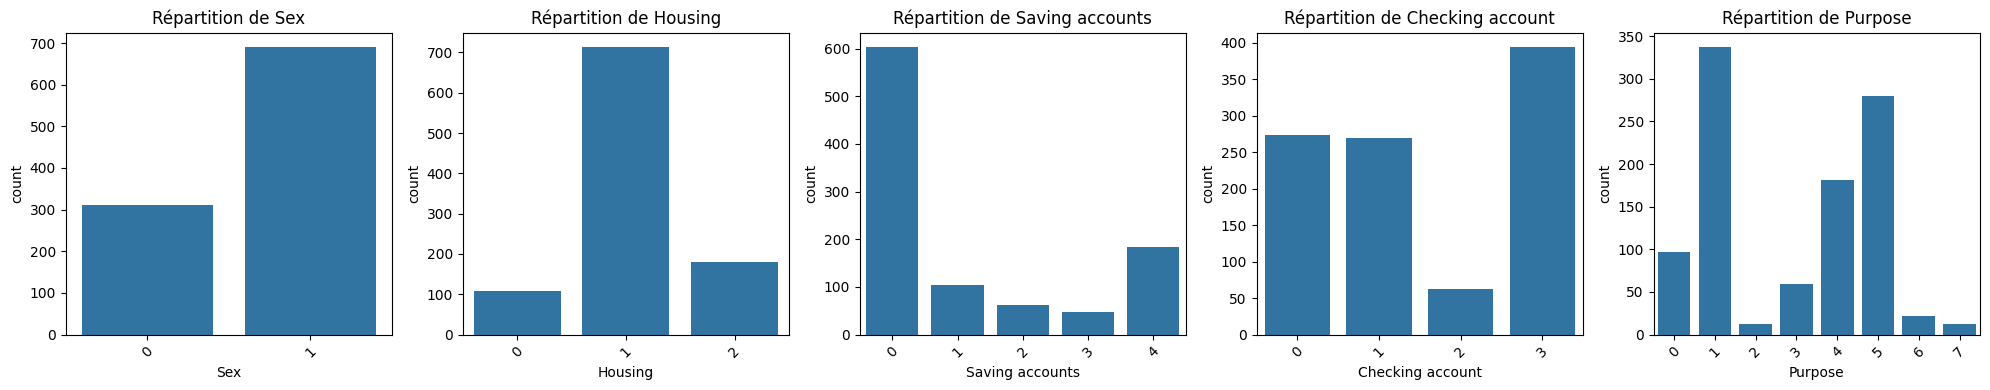

In [7]:
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
fig, axes = plt.subplots(1, len(cat_cols), figsize=(20, 4))
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Répartition de {col}")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 🧠 Interprétation des Variables Catégorielles

### 🧍‍♂️ Sex  
La majorité des clients sont des hommes, ce qui se reflète par une barre significativement plus haute que celle des femmes.

### 🏠 Housing  
La plupart des clients **sont propriétaires** de leur logement. Une part plus faible loue ou bénéficie d’un logement gratuit.

### 💰 Saving Accounts  
Beaucoup de clients disposent de **peu ou pas d’épargne**. Les comptes avec des économies élevées sont peu fréquents.

### 🏦 Checking Account  
Même tendance que pour les comptes d’épargne : **faible solde ou aucun compte courant** pour la majorité des clients.

### 🎯 Purpose  
Les prêts sont majoritairement destinés à l’achat de **voitures** ou de **meubles**. Les autres motifs (éducation, etc.) sont moins fréquents.

---

### ✅ Points Clés

- **Profil type du client** : Homme, propriétaire, avec peu d’épargne ou de fonds disponibles.  
- **Objectif des prêts** : Principalement pour des **biens matériels** (voiture, mobilier).  
- **Indicateur de risque potentiel** : Les faibles soldes sur les comptes peuvent signaler une **fragilité financière**.

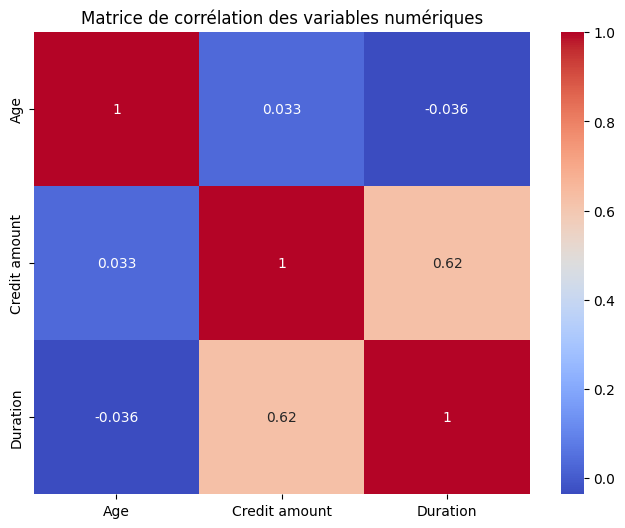

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation des variables numériques")
plt.show()

## 🔗 Analyse de la Matrice de Corrélation

| 📊 Variable 1     | 📊 Variable 2     | 🔢 Corrélation | 🧠 Interprétation                  |
|------------------|------------------|----------------|-----------------------------------|
| Age              | Duration         | -0.036         | Corrélation négligeable           |
| Age              | Credit amount    | +0.033         | Corrélation négligeable           |
| Duration         | Credit amount    | **+0.62**      | Corrélation fortement positive    |

---

### ✅ Insights Clés

#### 📈 `Duration` vs `Credit amount` (**+0.62**)
- Il existe une **relation positive forte** entre la durée du prêt et le montant emprunté.
- Cela est logique du point de vue métier : les **prêts plus importants** (ex : hypothèques) sont souvent accordés avec **des durées de remboursement plus longues**.

#### 👤 `Age` vs `Duration` / `Credit amount`
- Les corrélations sont proches de **zéro** (−0.036 et +0.033), indiquant :
  - **Aucune relation linéaire significative** entre l'âge du client et la taille ou la durée du prêt.

---

### 💼 Implications Métier

- **📅 Tarification des Prêts** :
  - La forte corrélation **durée ↔ montant** suggère que les **prêts plus importants devraient avoir des durées plus longues** par défaut.
  - La **durée** peut servir de **proxy pour estimer le montant du prêt** dans les modèles de risque.

- **👥 Profilage Client** :
  - L'**âge n’est pas un bon prédicteur** des caractéristiques du prêt.
  - Il est plus pertinent de se concentrer sur des variables comme **le revenu** ou **l’objet du prêt**.



In [9]:
num_cols = ['Age', 'Credit amount', 'Duration']
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

df_clean = remove_outliers(df, num_cols)
print(f"Lignes avant nettoyage : {len(df)}")
print(f"Lignes après nettoyage : {len(df_clean)}")

Lignes avant nettoyage : 1000
Lignes après nettoyage : 861


## 🧼 Suppression des Valeurs Aberrantes (Outliers)

Nous appliquons la méthode de l'**écart interquartile (IQR)** pour détecter et supprimer les **valeurs aberrantes** sur les variables numériques suivantes :

- `Age`
- `Credit amount`
- `Duration`

🔎 **Méthode** :
Pour chaque variable :
- Calcul des 1er (Q1) et 3e quartiles (Q3)
- Calcul de l'IQR = Q3 - Q1
- Définition des bornes :
  - **Borne inférieure** : Q1 - 1.5 × IQR  
  - **Borne supérieure** : Q3 + 1.5 × IQR  
- Suppression des lignes contenant des valeurs en dehors de cet intervalle

📊 Cela permet de **nettoyer le dataset** et de limiter l’impact des extrêmes sur l’entraînement du modèle.

## 🚦 Préparation des Données pour l'Apprentissage

- Nous définissons la **variable cible** `y` comme une variable binaire indiquant si le montant du crédit est supérieur à la médiane (`1` pour montant élevé, `0` sinon).
- Les **features** `X` correspondent à toutes les colonnes sauf `Credit amount`.
- Ensuite, nous séparons les données en **ensemble d'entraînement** (80%) et **ensemble de test** (20%) avec une graine aléatoire fixe (`random_state=42`) pour garantir la reproductibilité.

Cette étape est essentielle pour évaluer la performance du modèle sur des données jamais vues.


In [10]:
X = df_clean.drop(columns=['Credit amount'])
y = (df_clean['Credit amount'] > df['Credit amount'].median()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Construction du Modèle de Réseau de Neurones (ANN)

- Modèle séquentiel avec 3 couches :
  - **Couche Dense** de 64 neurones avec activation ReLU, adaptée à la couche d’entrée (nombre de features).
  - **Dropout** à 20% pour réduire le surapprentissage (overfitting).
  - **Couche Dense** de 32 neurones avec activation ReLU.
  - **Dropout** à 20% encore pour régularisation.
  - **Couche de sortie** avec 1 neurone et activation sigmoïde, adaptée à un problème de classification binaire.

- Compilation avec :
  - Optimiseur **Adam** (taux d’apprentissage 0.001).
  - Fonction de perte **binary_crossentropy** (classification binaire).
  - Métrique d’évaluation : **accuracy** (précision).


In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\ahnid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 🏋️ Entraînement du Modèle

- Entraînement du réseau de neurones sur les données d’entraînement (`X_train`, `y_train`)  
- Nombre d’**époques** : 50 (le modèle passe 50 fois sur tout le dataset)  
- **Taille du batch** : 32 (le nombre d’échantillons traités avant mise à jour des poids)  
- Validation interne sur 20% des données d’entraînement (`validation_split=0.2`) pour suivre la performance sur un set non vu pendant l’entraînement  
- Affichage détaillé des progrès (`verbose=1`)


In [13]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5425 - loss: 0.7995 - val_accuracy: 0.5797 - val_loss: 0.6843
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4976 - loss: 0.7200 - val_accuracy: 0.6449 - val_loss: 0.6678
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5311 - loss: 0.7059 - val_accuracy: 0.6594 - val_loss: 0.6575
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5929 - loss: 0.6704 - val_accuracy: 0.6594 - val_loss: 0.6446
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5783 - loss: 0.6648 - val_accuracy: 0.6522 - val_loss: 0.6338
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6249 - loss: 0.6580 - val_accuracy: 0.6594 - val_loss: 0.6263
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6426 - loss: 0.6303 - val_accuracy: 0.6594 - val_loss: 0.6108
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6609 - loss: 0.6242 - val_accuracy: 0.6812 - val_loss

## 📈 Visualisation de l'Entraînement

Ce graphique montre l’évolution de la **perte (loss)** et de la **précision (accuracy)** sur les ensembles d’entraînement et de validation au fil des époques :

- La **loss train** et la **loss val** indiquent comment le modèle minimise son erreur.  
- La **accuracy train** et la **accuracy val** mesurent la performance en classification.  
- Suivre ces courbes permet de détecter le surapprentissage ou le sous-apprentissage.

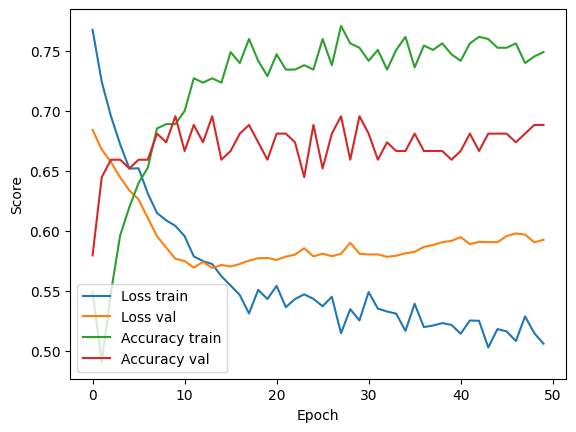

In [15]:
plt.plot(history.history['loss'], label='Loss train')
plt.plot(history.history['val_loss'], label='Loss val')
plt.plot(history.history['accuracy'], label='Accuracy train')
plt.plot(history.history['val_accuracy'], label='Accuracy val')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.show()

## 🔍 Prédiction et Matrice de Confusion

- On prédit la probabilité que chaque client ait un crédit élevé avec `model.predict`.
- On convertit ces probabilités en classes binaires (`0` ou `1`) avec un seuil de 0.5.
- Puis on calcule la **matrice de confusion** pour comparer les prédictions aux vraies valeurs.

Cette matrice nous aide à comprendre les erreurs du modèle en détail.

In [20]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:\n", confusion_mat)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Matrice de confusion:
 [[64 33]
 [25 51]]


## 🧮 Matrice de Confusion

|               | Prédit : Faible crédit | Prédit : Crédit élevé |
|---------------|------------------------|----------------------|
| Réel : Faible crédit  | 64 (Vrais négatifs)        | 33 (Faux positifs)       |
| Réel : Crédit élevé   | 25 (Faux négatifs)         | 51 (Vrais positifs)      |

### 📊 Interprétation

- **64** : Le modèle a correctement prédit un **faible risque de crédit** (vrais négatifs).  
- **51** : Le modèle a correctement prédit un **crédit élevé** (vrais positifs).  
- **33** : Le modèle a prédit un **crédit élevé** alors que c'était en réalité un faible crédit (faux positifs).  
- **25** : Le modèle a prédit un **faible crédit** alors que c'était un crédit élevé (faux négatifs).

---

### 🤔 Conclusion

- Le modèle fait des erreurs, mais il devine correctement un peu plus de la moitié du temps.  
- Il y a une marge d'amélioration possible, notamment pour réduire les erreurs de type faux positifs et faux négatifs.


## 🔄 Comparaison avec un Modèle de Régression Logistique

- Création et entraînement d’un modèle de **régression logistique** (classique pour la classification binaire).
- Utilisation de `max_iter=1000` pour assurer la convergence.
- Prédiction sur l’ensemble de test.
- Affichage d’un **rapport de classification** détaillé avec :
  - Précision (precision)
  - Rappel (recall)
  - F1-score
  - Support (nombre d’exemples par classe)

Cette comparaison permet d’évaluer si notre réseau de neurones apporte un gain significatif.


In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.74      0.74      0.74        97
           1       0.67      0.67      0.67        76

    accuracy                           0.71       173
   macro avg       0.71      0.71      0.71       173
weighted avg       0.71      0.71      0.71       173



## 📊 Interprétation du Rapport de Classification (Régression Logistique)

| Classe | Précision | Rappel | F1-score | Support |
|--------|-----------|--------|----------|---------|
| 0 (Faible crédit) | 0.74      | 0.74   | 0.74     | 97      |
| 1 (Crédit élevé)  | 0.67      | 0.67   | 0.67     | 76      |

### 🔑 Résumé

- **Précision** :  
  - Classe 0 : 74% des prédictions faibles crédits sont correctes.  
  - Classe 1 : 67% des prédictions crédits élevés sont correctes.

- **Rappel** :  
  - Classe 0 : 74% des vrais faibles crédits sont bien détectés.  
  - Classe 1 : 67% des vrais crédits élevés sont bien détectés.

- **F1-score** (moyenne harmonique précision/rappel) est équilibré pour les deux classes.

- **Accuracy globale** : 71% des prédictions totales sont correctes.

### 🤔 Conclusion

Le modèle de régression logistique obtient une bonne performance, légèrement meilleure pour détecter les faibles crédits.  
Le déséquilibre des scores suggère que le modèle a plus de mal à identifier parfaitement les crédits élevés, ce qui peut être crucial en gestion du risque.  
Cela justifie d'explorer des modèles plus complexes ou des techniques d'équilibrage des classes pour améliorer la détection.


## 🧠 Interprétabilité avec SHAP (SHapley Additive exPlanations)

- SHAP permet d'expliquer l'impact de chaque **feature** sur la prédiction d’un modèle.
- Ici, on utilise `shap.Explainer` pour interpréter notre modèle de deep learning.
- On applique SHAP à un échantillon des 100 premiers exemples du jeu de test.

### 📊 Visualisation : `summary_plot`

- Le **summary plot** affiche :
  - L’importance moyenne de chaque variable sur les prédictions.
  - La direction de l’effet (valeurs SHAP positives : vers classe 1 / négatives : vers classe 0).
  - Les points rouges = valeurs élevées, les bleus = valeurs faibles.
- Ce graphique aide à comprendre **quelles variables influencent le plus le modèle** (par exemple : Durée, Crédit amount, etc.).

590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
599/599 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
670/670 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  10%|█         | 10/100 [00:00<?, ?it/s]

674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  12%|█▏        | 12/100 [00:12<01:07,  1.31it/s]

582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  13%|█▎        | 13/100 [00:14<01:58,  1.36s/it]

716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  14%|█▍        | 14/100 [00:18<03:13,  2.25s/it]

606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  15%|█▌        | 15/100 [00:19<02:47,  1.97s/it]

611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  16%|█▌        | 16/100 [00:20<02:27,  1.76s/it]

590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  17%|█▋        | 17/100 [00:23<02:56,  2.13s/it]

606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  18%|█▊        | 18/100 [00:24<02:26,  1.78s/it]

615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  19%|█▉        | 19/100 [00:25<02:05,  1.55s/it]

592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  20%|██        | 20/100 [00:26<01:51,  1.39s/it]

654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  21%|██        | 21/100 [00:27<01:40,  1.28s/it]

580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  22%|██▏       | 22/100 [00:28<01:32,  1.18s/it]

578/578 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  23%|██▎       | 23/100 [00:30<01:30,  1.17s/it]

640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  24%|██▍       | 24/100 [00:31<01:33,  1.23s/it]

618/618 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  25%|██▌       | 25/100 [00:33<01:58,  1.58s/it]

559/559 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


ExactExplainer explainer:  26%|██▌       | 26/100 [00:36<02:14,  1.82s/it]

721/721 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  27%|██▋       | 27/100 [00:37<02:08,  1.77s/it]

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


ExactExplainer explainer:  28%|██▊       | 28/100 [00:39<02:01,  1.68s/it]

551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  29%|██▉       | 29/100 [00:40<01:47,  1.51s/it]

573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  30%|███       | 30/100 [00:41<01:44,  1.49s/it]

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  31%|███       | 31/100 [00:43<01:43,  1.50s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  32%|███▏      | 32/100 [00:44<01:39,  1.46s/it]

600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  33%|███▎      | 33/100 [00:45<01:31,  1.37s/it]

660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  34%|███▍      | 34/100 [00:47<01:31,  1.38s/it]

602/602 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  35%|███▌      | 35/100 [00:48<01:20,  1.24s/it]

550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  36%|███▌      | 36/100 [00:49<01:12,  1.14s/it]

598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  37%|███▋      | 37/100 [00:50<01:13,  1.16s/it]

598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  38%|███▊      | 38/100 [00:51<01:12,  1.17s/it]

634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  39%|███▉      | 39/100 [00:52<01:10,  1.15s/it]

652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  40%|████      | 40/100 [00:53<01:10,  1.18s/it]

611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  41%|████      | 41/100 [00:54<01:04,  1.10s/it]

592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  42%|████▏     | 42/100 [00:55<00:59,  1.03s/it]

675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  43%|████▎     | 43/100 [00:56<00:55,  1.03it/s]

726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  44%|████▍     | 44/100 [00:57<00:57,  1.03s/it]

611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  45%|████▌     | 45/100 [00:58<00:55,  1.00s/it]

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  46%|████▌     | 46/100 [00:59<00:55,  1.03s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  47%|████▋     | 47/100 [01:01<01:00,  1.14s/it]

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ExactExplainer explainer:  48%|████▊     | 48/100 [01:02<00:56,  1.09s/it]

568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  49%|████▉     | 49/100 [01:02<00:53,  1.05s/it]

582/582 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  50%|█████     | 50/100 [01:03<00:49,  1.02it/s]

586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  51%|█████     | 51/100 [01:04<00:47,  1.04it/s]

612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  52%|█████▏    | 52/100 [01:05<00:46,  1.02it/s]

612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  53%|█████▎    | 53/100 [01:06<00:44,  1.05it/s]

572/572 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  54%|█████▍    | 54/100 [01:07<00:40,  1.13it/s]

640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  55%|█████▌    | 55/100 [01:08<00:41,  1.07it/s]

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  56%|█████▌    | 56/100 [01:09<00:43,  1.01it/s]

696/696 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  57%|█████▋    | 57/100 [01:10<00:43,  1.00s/it]

586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  58%|█████▊    | 58/100 [01:11<00:41,  1.02it/s]

684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  59%|█████▉    | 59/100 [01:13<00:51,  1.25s/it]

569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  60%|██████    | 60/100 [01:14<00:45,  1.13s/it]

569/569 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  61%|██████    | 61/100 [01:15<00:41,  1.06s/it]

582/582 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  62%|██████▏   | 62/100 [01:15<00:36,  1.05it/s]

675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  63%|██████▎   | 63/100 [01:16<00:33,  1.10it/s]

595/595 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  64%|██████▍   | 64/100 [01:17<00:30,  1.18it/s]

681/681 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▌   | 65/100 [01:18<00:29,  1.18it/s]

689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  66%|██████▌   | 66/100 [01:18<00:28,  1.20it/s]

693/693 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  67%|██████▋   | 67/100 [01:19<00:26,  1.22it/s]

689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  68%|██████▊   | 68/100 [01:20<00:26,  1.19it/s]

580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  69%|██████▉   | 69/100 [01:21<00:26,  1.15it/s]

614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  70%|███████   | 70/100 [01:22<00:28,  1.07it/s]

564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  71%|███████   | 71/100 [01:23<00:27,  1.05it/s]

558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  72%|███████▏  | 72/100 [01:24<00:26,  1.07it/s]

667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  73%|███████▎  | 73/100 [01:25<00:26,  1.01it/s]

575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  74%|███████▍  | 74/100 [01:26<00:25,  1.03it/s]

616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  75%|███████▌  | 75/100 [01:27<00:24,  1.02it/s]

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  76%|███████▌  | 76/100 [01:28<00:22,  1.05it/s]

607/607 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  77%|███████▋  | 77/100 [01:29<00:20,  1.10it/s]

564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  78%|███████▊  | 78/100 [01:30<00:18,  1.16it/s]

598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  79%|███████▉  | 79/100 [01:30<00:17,  1.23it/s]

559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  80%|████████  | 80/100 [01:31<00:15,  1.29it/s]

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  81%|████████  | 81/100 [01:32<00:14,  1.29it/s]

610/610 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  82%|████████▏ | 82/100 [01:32<00:13,  1.32it/s]

593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  83%|████████▎ | 83/100 [01:33<00:12,  1.35it/s]

588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  84%|████████▍ | 84/100 [01:34<00:13,  1.19it/s]

621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  85%|████████▌ | 85/100 [01:35<00:13,  1.10it/s]

716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  86%|████████▌ | 86/100 [01:36<00:12,  1.12it/s]

600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  87%|████████▋ | 87/100 [01:37<00:11,  1.18it/s]

670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  88%|████████▊ | 88/100 [01:39<00:13,  1.11s/it]

602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  89%|████████▉ | 89/100 [01:40<00:12,  1.11s/it]

593/593 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  90%|█████████ | 90/100 [01:41<00:11,  1.11s/it]

566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  91%|█████████ | 91/100 [01:42<00:10,  1.12s/it]

612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  92%|█████████▏| 92/100 [01:43<00:08,  1.12s/it]

666/666 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  93%|█████████▎| 93/100 [01:44<00:08,  1.16s/it]

595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  94%|█████████▍| 94/100 [01:46<00:07,  1.19s/it]

571/571 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  95%|█████████▌| 95/100 [01:47<00:06,  1.40s/it]

602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  96%|█████████▌| 96/100 [01:49<00:05,  1.42s/it]

620/620 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  97%|█████████▋| 97/100 [01:50<00:04,  1.34s/it]

664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  98%|█████████▊| 98/100 [01:51<00:02,  1.32s/it]

570/570 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  99%|█████████▉| 99/100 [01:52<00:01,  1.19s/it]

662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 100%|██████████| 100/100 [01:53<00:00,  1.14s/it]

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 101it [01:54,  1.26s/it]                         


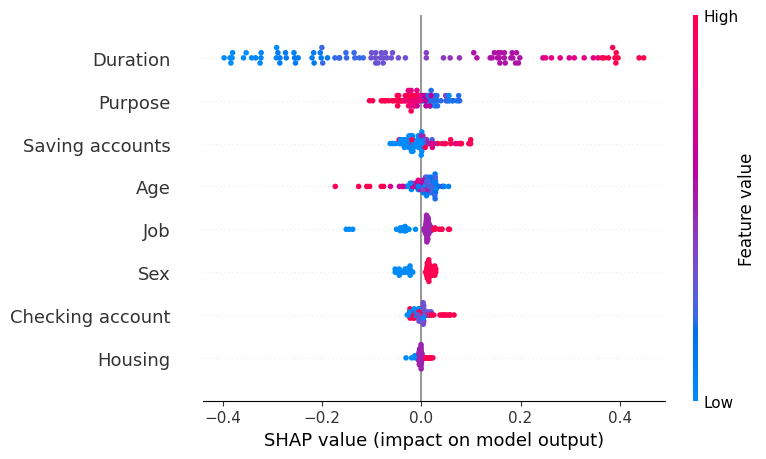

In [28]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test[:100])
shap.summary_plot(shap_values, features=X_test[:100], feature_names=X.columns)

## 🔍 Interprétation Simple des Valeurs SHAP

### 📌 1. Variables les plus importantes
- **Duration (durée du prêt)** 📆 → plus grand impact sur les prédictions.
- **Purpose (motif du prêt)** 🛠️ et **Saving accounts (épargne)** 💰 → également très influents.

### 📈 2. Comment ces variables influencent le modèle
- 🔴 **Durée longue** → **Risque élevé** (pousse la prédiction vers la droite).
- 🔵 **Durée courte** → **Risque faible** (pousse la prédiction vers la gauche).
- 💸 **Épargne faible** → Risque plus élevé.
- 💵 **Bonne épargne** → Risque plus faible.

### 🔻 3. Variables moins importantes
- 🧓 **Âge**, 👔 **Job**, 🚻 **Sexe** : ont peu d’effet (valeurs SHAP proches de 0).

---

### 💡 Insight clé
Le modèle prend ses décisions principalement selon **la durée du prêt** et **le niveau d’épargne**.  
Les variables comme **le sexe ou l’âge** n’ont presque aucun impact sur les prédictions.

---

### 🧠 Recommandations métier
- ✅ **Accorder plus rapidement les prêts à court terme**.
- 🔍 **Surveiller les soldes d’épargne** pour évaluer le risque.
- 🚫 **Ne pas fonder les décisions sur le sexe ou l’âge**, car ils ne prédisent pas bien le risque.

In [30]:
shap_values_abs = np.abs(shap_values.values).mean(axis=0)
shap_impact = pd.Series(shap_values_abs, index=X.columns).sort_values(ascending=False)
print(shap_impact)


Duration            0.215872
Purpose             0.031360
Saving accounts     0.027028
Age                 0.023693
Job                 0.023621
Sex                 0.022131
Checking account    0.013726
Housing             0.004852
dtype: float64


## 💾 Sauvegarde du Modèle
- On utilise `model.save()` pour enregistrer le modèle au format `.h5` (HDF5).
- Le dossier `models/` est créé automatiquement s’il n’existe pas (`exist_ok=True`).

### 📁 Chemin utilisé :
- Dossier : `models/`
- Fichier : `credit_model.h5`

In [ ]:
os.makedirs('models', exist_ok=True)
model.save('models/credit_model.h5')
df.to_csv("data/clean_data.csv", index=False)
